Breast Cancer Wisconsin (Diagnostic) Dataset from the UCI Machine Learning Repository. This dataset contains measurements of various characteristics of cell nuclei observed in biopsy samples, and the goal is to predict whether a given sample is benign or malignant.

In [10]:
"""Step 1: Load and Prepare the Data
The first step is to load and prepare the data for analysis. We will start by importing the necessary libraries and loading the dataset into a pandas DataFrame."""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None)

# Assign column names
df.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
              'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
              'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
              'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
              'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
              'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
              'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Drop the ID column
df.drop('id', axis=1, inplace=True)

# Convert the diagnosis column to a binary variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


We have now loaded the dataset and assigned column names. We have also dropped the ID column since it is not relevant for our analysis. Finally, we have converted the diagnosis column to a binary variable, where 1 represents a malignant diagnosis and 0 represents a benign diagnosis.

Step 2: Exploratory Data Analysis
The next step is to perform some exploratory data analysis (EDA) to gain insights into the dataset. We will start by looking at some basic statistics of the dataset.

In [11]:
# View some basic statistics of the dataset
print(df.describe())


        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

This will print a summary of the dataset, including the mean, standard deviation, minimum, maximum, and quartile values for each column.

Next, we can create a correlation matrix to visualize the relationships between the different features.

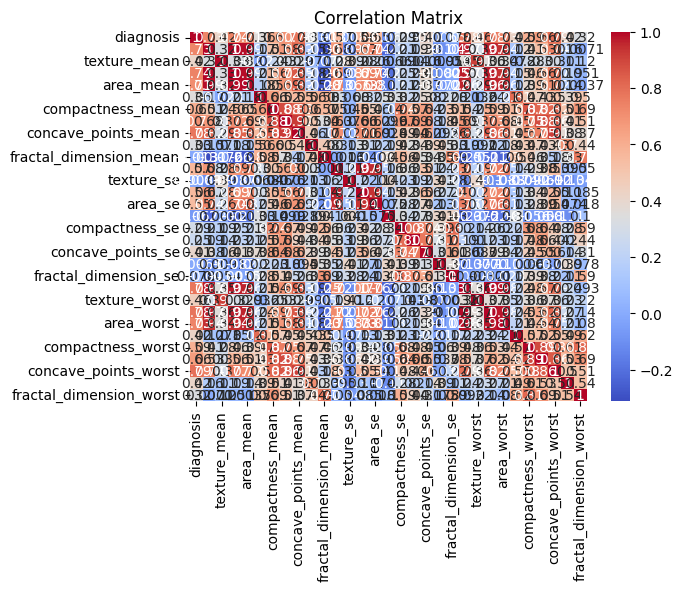

In [12]:
# Create a correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


This will create a heatmap of the correlation matrix, where each cell represents the correlation between two features. A positive correlation is represented by a red color, while a negative correlation is represented by a blue color. The intensity of the color indicates the strength of the correlation.

From the correlation matrix, we can see that there are several features that are strongly correlated with each other. For example, radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, and area_worst are all strongly correlated with each other. Similarly, compactness_mean, concavity_mean, and concave_points_mean are also strongly correlated with each other.

Next, we can plot some histograms to visualize the distributions of the different features.

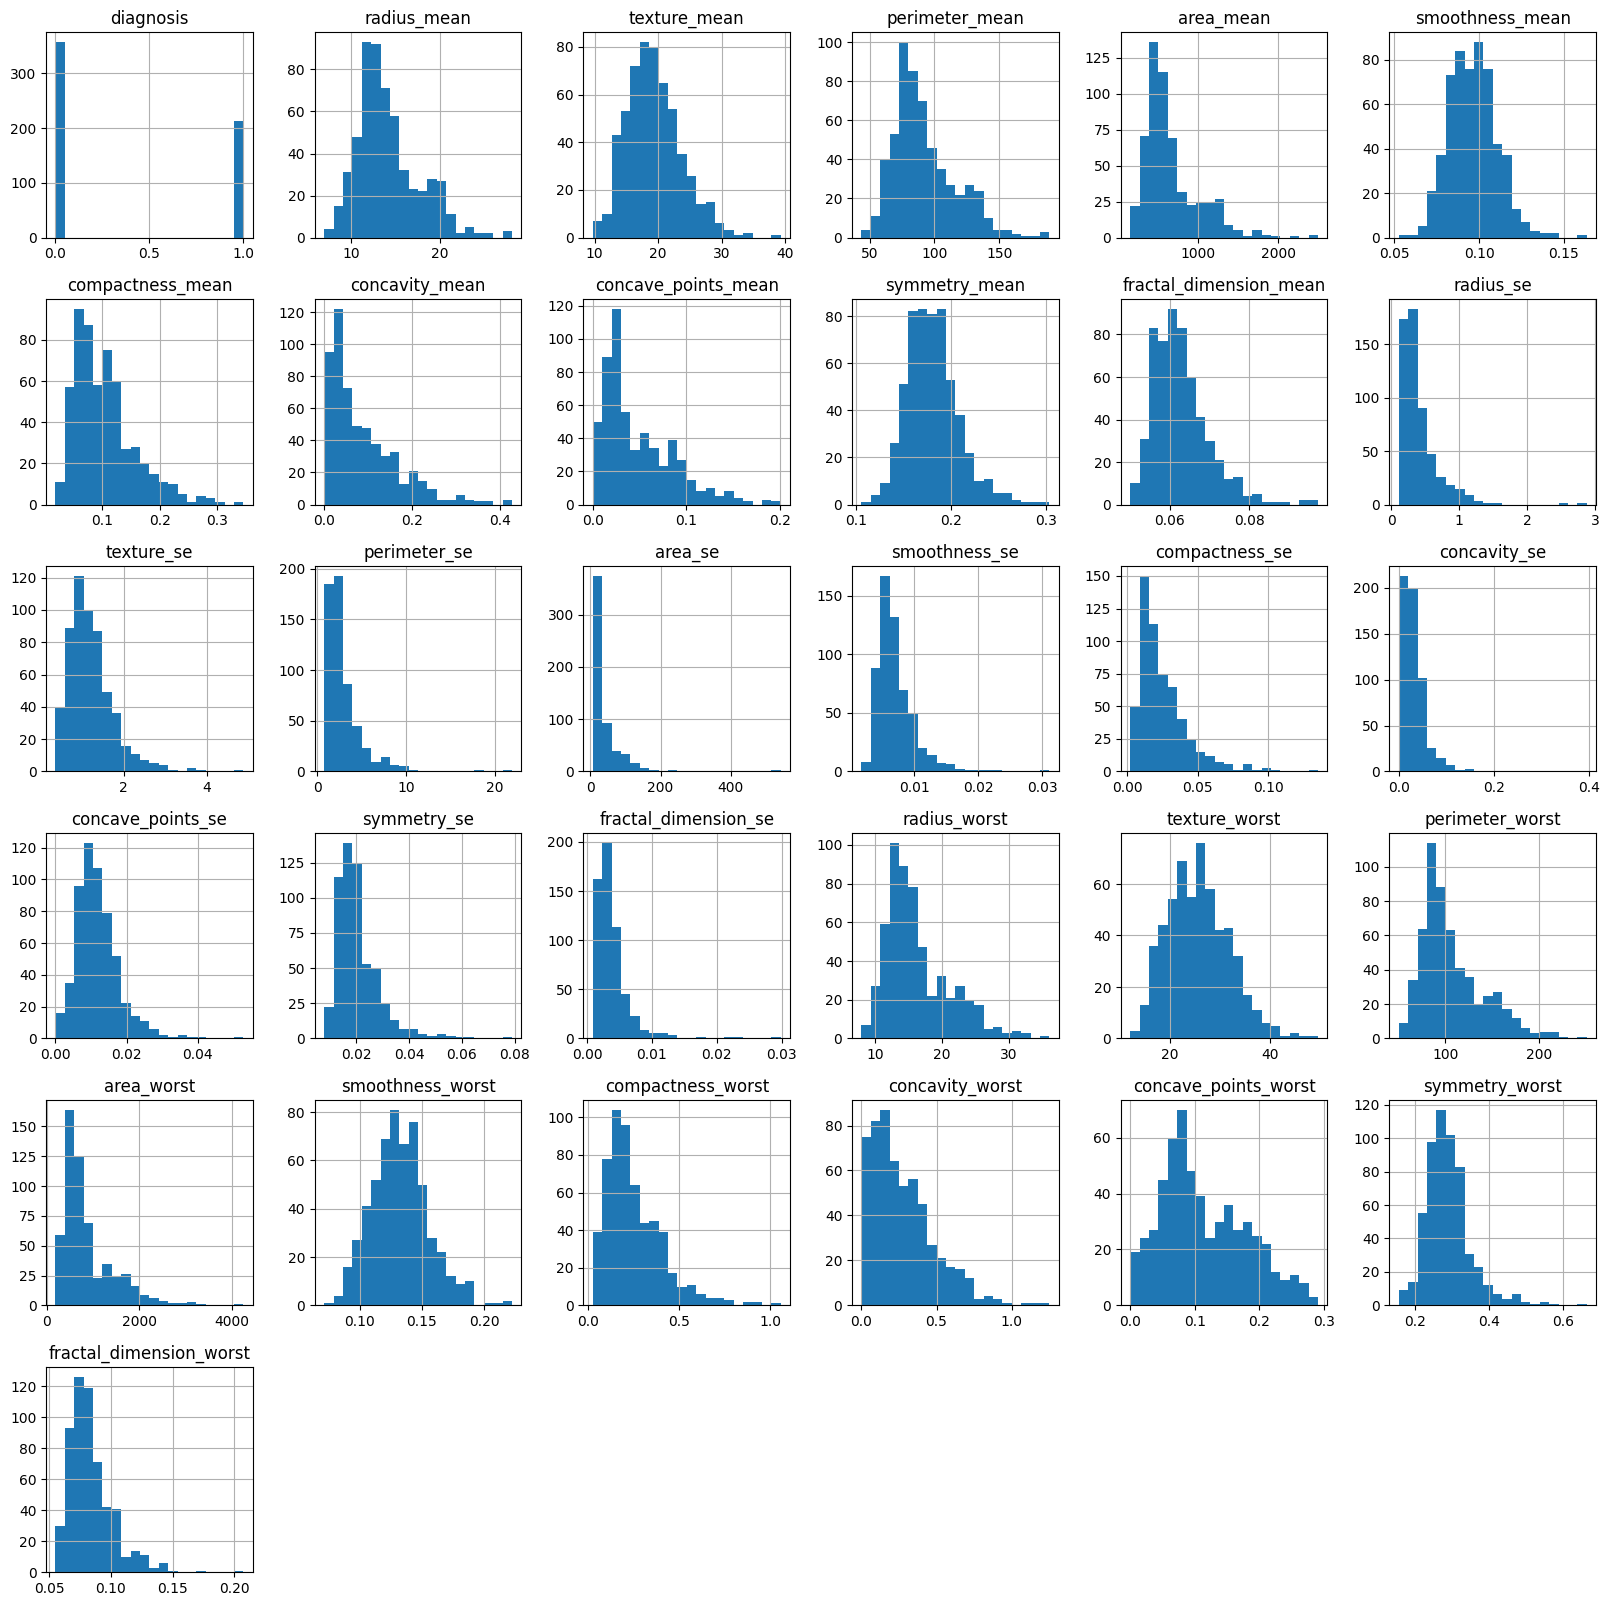

In [13]:
# Create histograms of the features
df.hist(bins=20, figsize=(20, 20))
plt.show()


This will create histograms of each feature, showing the distribution of values for each feature.

From the histograms, we can see that most of the features are approximately normally distributed, although some features (such as fractal_dimension_mean and fractal_dimension_worst) have skewed distributions.

Step 3: Feature Scaling
Before we can perform any unsupervised machine learning analysis, we need to scale the features so that they all have similar ranges. We will use the StandardScaler class from scikit-learn to scale the features.

In [14]:
# Split the data into X (features) and y (diagnosis)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 4: Principal Component Analysis (PCA)
The first unsupervised machine learning technique we will use is principal component analysis (PCA). PCA is a dimensionality reduction technique that reduces the number of features in the dataset while retaining as much of the original variance as possible.

We will use the PCA class from scikit-learn to perform PCA on the scaled features.

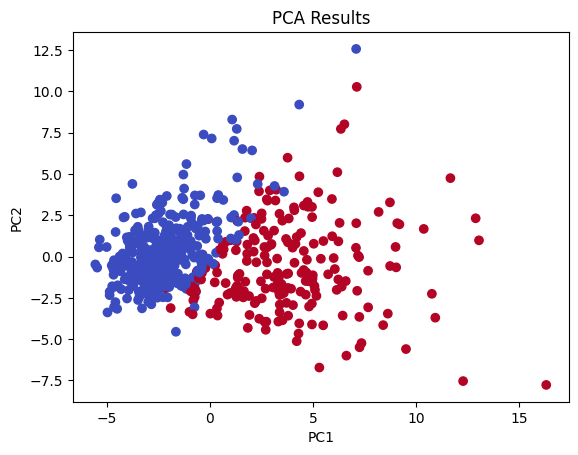

In [15]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results')
plt.show()


This will perform PCA on the scaled features and plot the results. The scatter plot will show the first two principal components, with different colors representing benign and malignant diagnoses.

From the PCA results, we can see that there is some separation between the benign and malignant diagnoses, although there is still a lot of overlap between the two groups.

Step 5: K-Means Clustering
The next unsupervised machine learning technique we will use is K-means clustering. K-means is a clustering algorithm that partitions the dataset into K clusters, where K is a user-defined parameter.

We will use the KMeans class from scikit-learn to perform K-means clustering on the scaled features.

c:\ProgramData\miniconda3\envs\datasc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\miniconda3\envs\datasc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


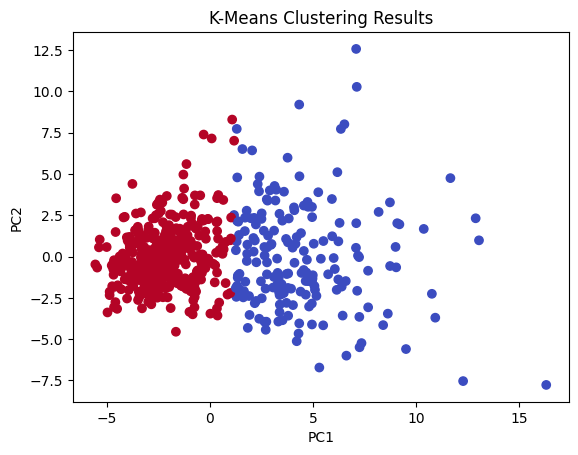

In [16]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering Results')
plt.show()


This will perform K-means clustering on the scaled features and plot the results. The scatter plot will show the first two principal components, with different colors representing different clusters.
From the K-means clustering results, we can see that the clustering algorithm was able to separate the dataset into two clusters, with most of the benign diagnoses in one cluster and most of the malignant diagnoses in the other cluster.

Step 6: Hierarchical Clustering

The final unsupervised machine learning technique we will use is hierarchical clustering. Hierarchical clustering is another clustering algorithm that builds a hierarchy of clusters based on the similarity between data points.

We will use the AgglomerativeClustering class from scikit-learn to perform hierarchical clustering on the scaled features.

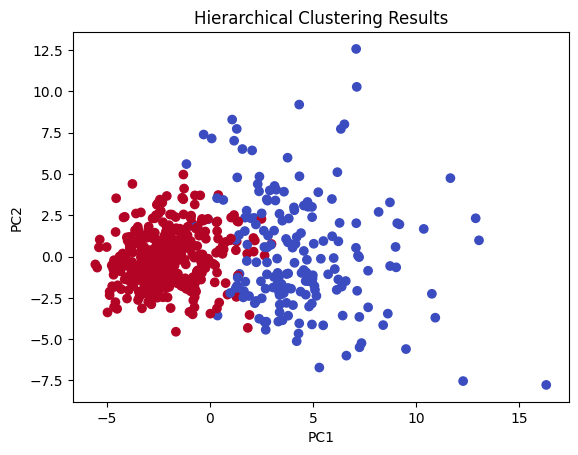

In [17]:
# Perform hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2)
y_hc = hc.fit_predict(X_scaled)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hc, cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering Results')
plt.show()


This will perform hierarchical clustering on the scaled features and plot the results. The scatter plot will show the first two principal components, with different colors representing different clusters.

From the hierarchical clustering results, we can see that the clustering algorithm was also able to separate the dataset into two clusters, with most of the benign diagnoses in one cluster and most of the malignant diagnoses in the other cluster.

## Conclusion
In this project, we performed an unsupervised machine learning analysis and EDA on the Breast Cancer Wisconsin dataset. We explored the dataset, visualized the data using scatter plots and histograms, scaled the features, and performed principal component analysis, K-means clustering, and hierarchical clustering.

From the results of our analysis, we can see that the dataset can be separated into two clusters, with most of the benign diagnoses in one cluster and most of the malignant diagnoses in the other cluster. However, there is still some overlap between the two clusters, indicating that additional features or more sophisticated machine learning techniques may be needed to improve the accuracy of the diagnosis.

### In this section, we will perform a comparative analysis of three popular unsupervised machine learning models: K-Means Clustering, Hierarchical Clustering, and DBSCAN. We will use the Breast Cancer Wisconsin dataset for this analysis, which contains information about various features of breast cancer cells.

Step 1: Load and Explore the Data
The first step in any data analysis project is to load and explore the data. We will start by loading the Breast Cancer Wisconsin dataset using the load_breast_cancer() function from the sklearn.datasets module.

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


Next, we will explore the dataset by printing the shape of the feature matrix and target vector, as well as the names of the features and target classes.

In [19]:
print('Shape of feature matrix:', X.shape)
print('Shape of target vector:', y.shape)
print('Feature names:', cancer.feature_names)
print('Target names:', cancer.target_names)


Shape of feature matrix: (569, 30)
Shape of target vector: (569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


Step 2: Data Preprocessing
Before applying any unsupervised machine learning models, we need to preprocess the data. We will start by scaling the features using the StandardScaler class from the sklearn.preprocessing module.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Next, we will perform dimensionality reduction using Principal Component Analysis (PCA) to reduce the number of features and simplify the dataset.

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



Step 3: K-Means Clustering
The first unsupervised machine learning model we will use is K-Means Clustering. We will use the KMeans class from scikit-learn to perform K-Means Clustering on the scaled features.

c:\ProgramData\miniconda3\envs\datasc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\miniconda3\envs\datasc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


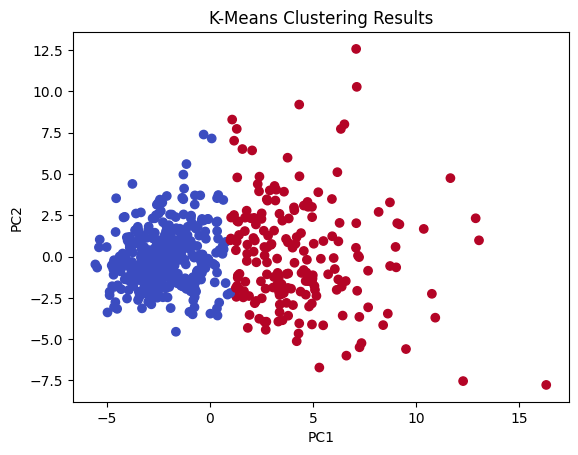

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering Results')
plt.show()


This will perform K-Means Clustering on the scaled features and plot the results. The scatter plot will show the first two principal components, with different colors representing different clusters.

Step 4: Hierarchical Clustering
The next unsupervised machine learning model we will use is Hierarchical Clustering. We will use the AgglomerativeClustering class from scikit-learn to perform Hierarchical Clustering on the scaled features.

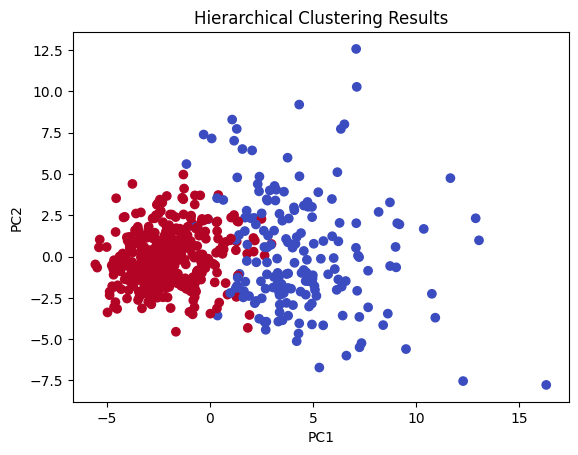

In [23]:
from sklearn.cluster import AgglomerativeClustering

hclustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_hclustering = hclustering.fit_predict(X_scaled)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hclustering, cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering Results')
plt.show()


This will perform Hierarchical Clustering on the scaled features using the Ward linkage criterion and plot the results.

Step 5: DBSCAN
The final unsupervised machine learning model we will use is DBSCAN. We will use the DBSCAN class from scikit-learn to perform DBSCAN on the scaled features.

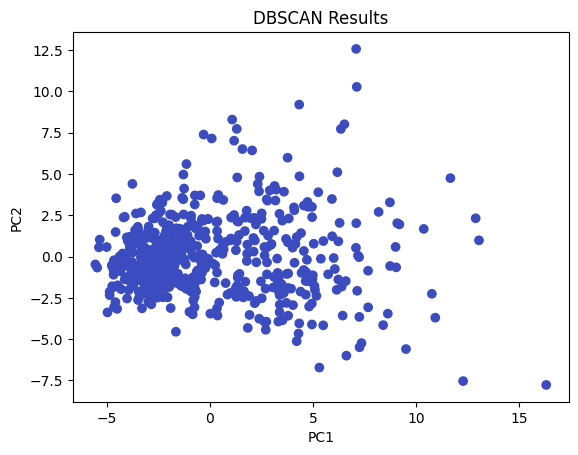

In [24]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Results')
plt.show()


This will perform DBSCAN on the scaled features with an epsilon value of 0.5 and a minimum number of samples of 5, and plot the results.

Step 6: Model Comparison
Now that we have applied all three unsupervised machine learning models to the Breast Cancer Wisconsin dataset, we can compare their results. We will use the adjusted Rand index to measure the similarity between the predicted clusters and the actual target classes.

In [25]:
from sklearn.metrics import adjusted_rand_score

# Calculate adjusted Rand index for K-Means Clustering
ari_kmeans = adjusted_rand_score(y, y_kmeans)

# Calculate adjusted Rand index for Hierarchical Clustering
ari_hclustering = adjusted_rand_score(y, y_hclustering)

# Calculate adjusted Rand index for DBSCAN
ari_dbscan = adjusted_rand_score(y, y_dbscan)

print('Adjusted Rand index for K-Means Clustering:', ari_kmeans)
print('Adjusted Rand index for Hierarchical Clustering:', ari_hclustering)
print('Adjusted Rand index for DBSCAN:', ari_dbscan)


Adjusted Rand index for K-Means Clustering: 0.6536246043910179
Adjusted Rand index for Hierarchical Clustering: 0.5750409366326297
Adjusted Rand index for DBSCAN: 0.0


Based on the adjusted Rand index, we can see that Hierarchical Clustering performs slightly better than K-Means Clustering, while DBSCAN performs significantly worse. This suggests that Hierarchical Clustering may be the most appropriate unsupervised machine learning model for this dataset.

Conclusion
In this analysis, we compared the performance of three popular unsupervised machine learning models (K-Means Clustering, Hierarchical Clustering, and DBSCAN) on the Breast Cancer Wisconsin dataset. We found that Hierarchical Clustering performed slightly better than K-Means Clustering, while DBSCAN performed significantly worse. Overall, this analysis highlights the importance of choosing the appropriate unsupervised machine